## Run a SWMM simulation

In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Local imports.
from urbansurge.file_utils import set_inp_section, add_prcp_timeseries, set_raingage

In [4]:
# Path to the SWMM inp file.
swmm_dir = Path(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\SWMM_Files\SWMM")
inp_name = "Canandaigua_Orig - Copy.inp"
out_name = "Canandaigua_Orig - Copy.out"

swmm_path = str(swmm_dir / inp_name)
swmm_out_path = str(swmm_dir / out_name)

print(swmm_path)

C:\Users\ay434\Box\Research\NSF_SCC\SWMM\SWMM_Files\SWMM\Canandaigua_Orig - Copy.inp


In [5]:
# SWMM simulation.
with Simulation(swmm_path) as sim:
    # Edit link parameters.
    component_name = 2
    # -----------------------------------
    section = 'CONDUITS'
    
    # Edit 1.
    column_name = 'Roughness'
    new_value = 0.03
    set_inp_section(swmm_path, section, column_name, component_name, new_value)
    
    # Diameter editing.
    # ----------------------------------------
    diam_section = 'XSECTIONS'
    column_name = 'Geom1'
    new_diam = 2

    # Set the new diameter.
    set_inp_section(swmm_path, diam_section, column_name, component_name, new_diam)
    
    # -----------------------------------
    
    # Edit precipitation timeseries.
    # -----------------------------------    
    # Edit 1.
    ts_name = 'TS_TEST'
    ts_description = 'TS_TEST_DESC'
    times = [0, 1, 2, 3, 4, 5, 6]
    values = [0, 1, 0.8, 0.6, 0.4, 0.2, 0.0]
    add_prcp_timeseries(swmm_path, ts_name, ts_description, times, values, overwrite=True)
    
    # Set new timeseries to rain gauge.
    section = 'RAINGAGES'
    rg_ts_name = f'TIMESERIES {ts_name}'
    component_name = 1
    column_name = 'Source'
    set_raingage(swmm_path, column_name, component_name, rg_ts_name)
    
    # -----------------------------------
    
    # Run the model.
    for ind, step in enumerate(sim):
        if ind % 100 == 0:
            print(sim.current_time, ",", round(sim.percent_complete * 100))


Exception: 
  ERROR 191: simulation start date comes after ending date.

### Model output

In [5]:
def unpack_series(series):
    "Unpacks SWMM output series into datetime and values."
    dts = [key for key in series.keys()]
    values = [val for val in series.values()]
    
    return dts, values

11
6
5


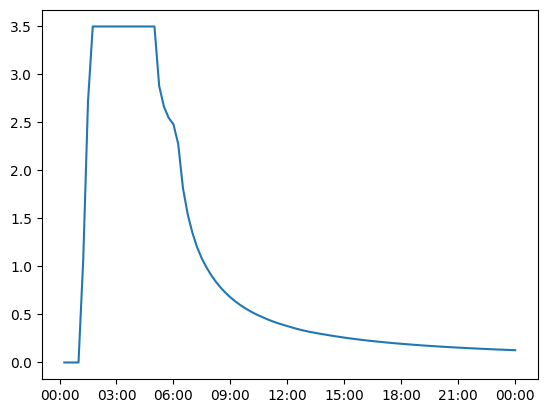

In [6]:
with Output(swmm_out_path) as out:
    print(len(out.subcatchments))
    print(len(out.nodes))
    print(len(out.links))
    
    link_dt, link_series = unpack_series(out.link_series('2', LinkAttribute.FLOW_RATE))
    node_dt, node_series = unpack_series(out.node_series('17', NodeAttribute.INVERT_DEPTH))
    
fig, ax = plt.subplots()
ax.plot(node_dt, node_series)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))